In [132]:
import numpy as np                   #importing numpy package for scientific computing
import matplotlib.pyplot as plt      #importing matplotlib package for plots
from scipy.signal import welch
import matplotlib
from matplotlib import animation
#from IPython.display import display, Image
import os
import glob
from scipy.fftpack import fft    # importing Fourier transform package
from scipy.stats import chi2     # importing confidence interval package

import wave_toolbox as wt

#plt.rcParams['figure.figsize'] = (15, 8)   # set the width and height of plots in inches
#plt.rcParams.update({'font.size': 13})     # change this value to your desired font size

<>:21: SyntaxWarning: invalid escape sequence '\e'
<>:21: SyntaxWarning: invalid escape sequence '\e'
C:\Users\adrie\AppData\Local\Temp\ipykernel_28504\229093264.py:21: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('$\eta$ [m] at x=' +str(xi[i]) +' m',fontsize=14)


Text(0.5, 0, 't [s]')

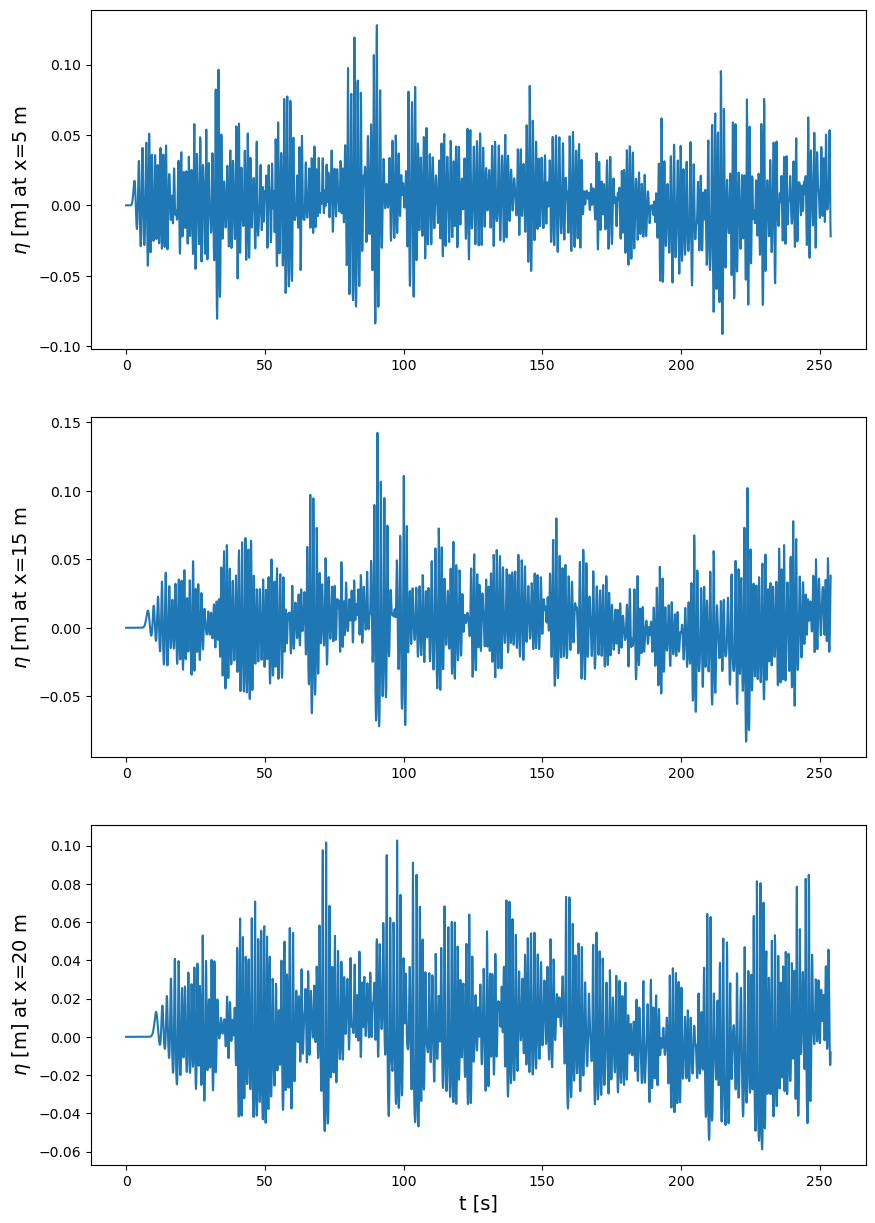

In [92]:
nx= 350 # number of output locations, see also swash input file
fdir = 'Numerical Model - Revision/Result'
filesep = '/'
fname = 'SK9'
time, x, eta, zbed, ux, h = wt.read_grid_output(fdir + filesep + fname+".tbl",nx)

dx = x[1]-x[0] # dx for the output grid

xi = (5, 15, 20) #positions at which you want to plot the timeseries in meters

mm=np.round(xi/dx)
nxi = mm.astype(int) # corresponding indices 

plt.figure(figsize=(10,15))

for i in range(len(xi)):
    plt.subplot(len(xi), 1, i+1)
    # eta_filtered = wt.frequency_filter(eta[nxi[i]], 10, f_low=0.03, f_high=2)
    # plt.plot(time,eta_filtered)
    plt.plot(time,eta[nxi[i],:])
    plt.ylabel('$\eta$ [m] at x=' +str(xi[i]) +' m',fontsize=14)
    
plt.xlabel('t [s]',fontsize=14)

In [93]:
Hs, Ts, Hmean, Tmean, Hi, Ti, E, f = wt.Analysis_all_locations(x,zbed,time,eta)
mean_wl = (eta.mean(axis=1))
max_wl = (eta.max(axis=1))



In [94]:
np.savetxt(fdir + filesep + fname+'_mwl.csv',mean_wl)
np.savetxt(fdir + filesep + fname+'_max_wl.csv',max_wl)
np.savetxt(fdir + filesep + fname+'_Hs.csv',Hs)

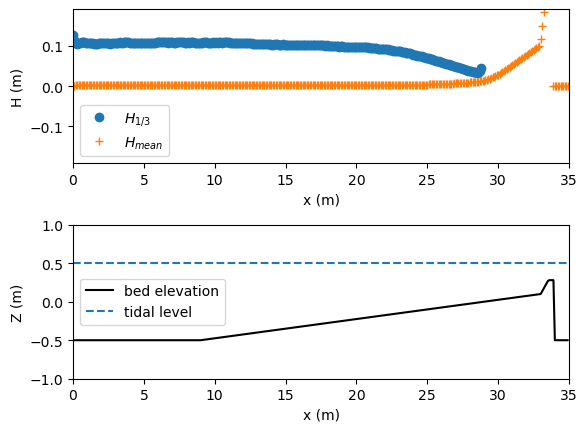

In [95]:
# --------------------------
#       Visualisation
# --------------------------
plt.subplot(2,1,1)
plt.plot(x,Hs,'o')
plt.plot(x,mean_wl,'+')
plt.legend(['$H_{1/3}$','$H_{mean}$'], numpoints = 1)
plt.xlabel('x (m)')
plt.ylabel('H (m)')
plt.xlim(0,35)
plt.xlim(0,35)
plt.ylim(-1.5*max(Hs),1.5*max(Hs))
plt.subplots_adjust(hspace=.4)
plt.subplot(2,1,2)
plt.plot(x, zbed,'k')
plt.xlabel('x (m)')
plt.ylabel('Z (m)');
plt.xlim(0,35)
plt.ylim(-1,1)
plt.axhline(0.5, ls = 'dashed')
plt.legend(['bed elevation','tidal level'], numpoints = 1)

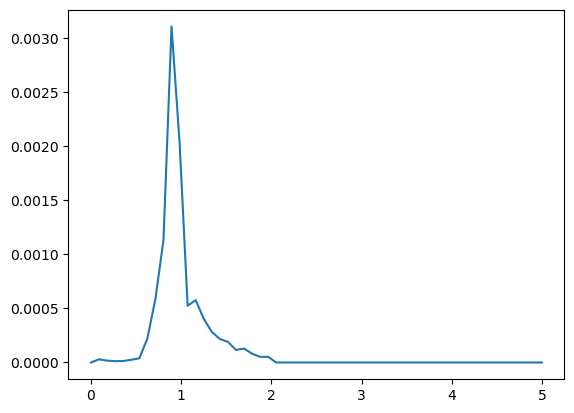

In [96]:
f_low = 0.03   
f_high = 2
idx = np.where((f[1,:] > f_high) | (f[1,:] <= f_low)) # we select the indices to filter out
E_filtered= E.copy()
E_filtered[:,idx] = 0

plt.plot(f[1,:],E_filtered[1,:])

    
#E[idx]=0.  # we set the the fourier coefficients corresponding to abs(f)>f_high and abs(f)<f_low to zero

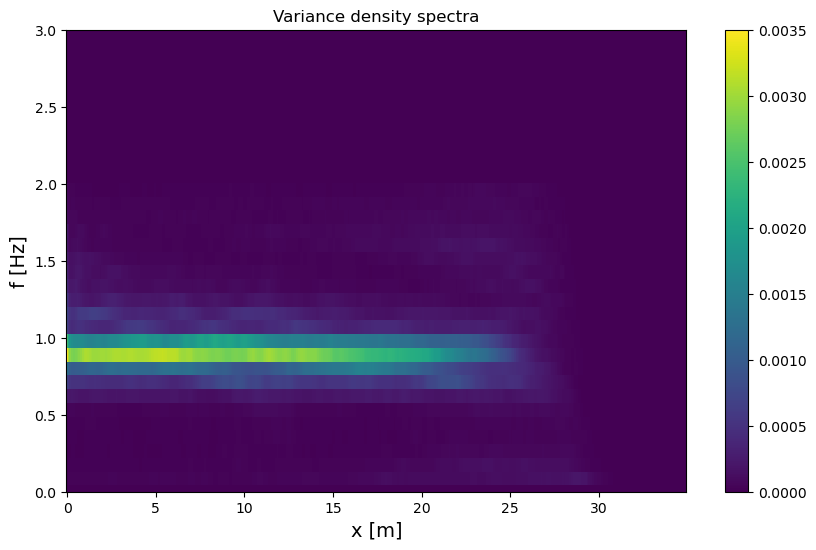

In [97]:
plt.figure(figsize=(10,6))
plt.pcolor(x,f[1,:],E_filtered.T)
plt.ylabel('f [Hz]',fontsize=14)
plt.xlabel('x [m]' ,fontsize=14)
plt.ylim(0,3)
plt.title('Variance density spectra')
plt.colorbar();
plt.show()

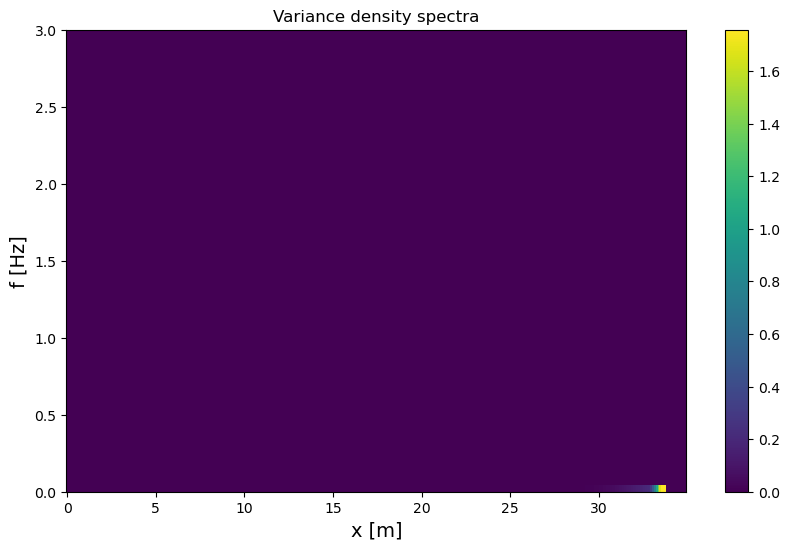

In [98]:
plt.figure(figsize=(10,6))
plt.pcolor(x,f[1,:],E.T)
plt.ylabel('f [Hz]',fontsize=14)
plt.xlabel('x [m]' ,fontsize=14)
plt.ylim(0,3)
plt.title('Variance density spectra')
plt.colorbar();
plt.show()

In [156]:
csv_files = glob.glob(fdir+filesep+'*max_wl.csv')
wl_max_all = []
for fil in csv_files:
    wl_max_all.append(np.loadtxt(fil,delimiter=','))

wl_max_all=np.array(wl_max_all)
wl_max_all = np.roll(wl_max_all, shift=-1, axis=0)

np.savetxt(fdir + filesep + 'hwl.csv',wl_max_all.T,delimiter=',')

In [157]:
wl_mean_all = np.loadtxt(fdir + filesep + 'mwl.csv',delimiter=',')
Hs_all = np.loadtxt(fdir + filesep + 'Hs.csv',delimiter=',')
wl_max_all = np.loadtxt(fdir + filesep + 'hwl.csv',delimiter=',')
print(Hs_all.shape)


(350, 10)


<>:17: SyntaxWarning: invalid escape sequence '\e'
<>:33: SyntaxWarning: invalid escape sequence '\e'
<>:17: SyntaxWarning: invalid escape sequence '\e'
<>:33: SyntaxWarning: invalid escape sequence '\e'
C:\Users\adrie\AppData\Local\Temp\ipykernel_28504\2433569645.py:17: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('$\eta$ (m)')
C:\Users\adrie\AppData\Local\Temp\ipykernel_28504\2433569645.py:33: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('$\eta$ (m)')


Text(0.5, 1.0, 'Significant Wave Height')

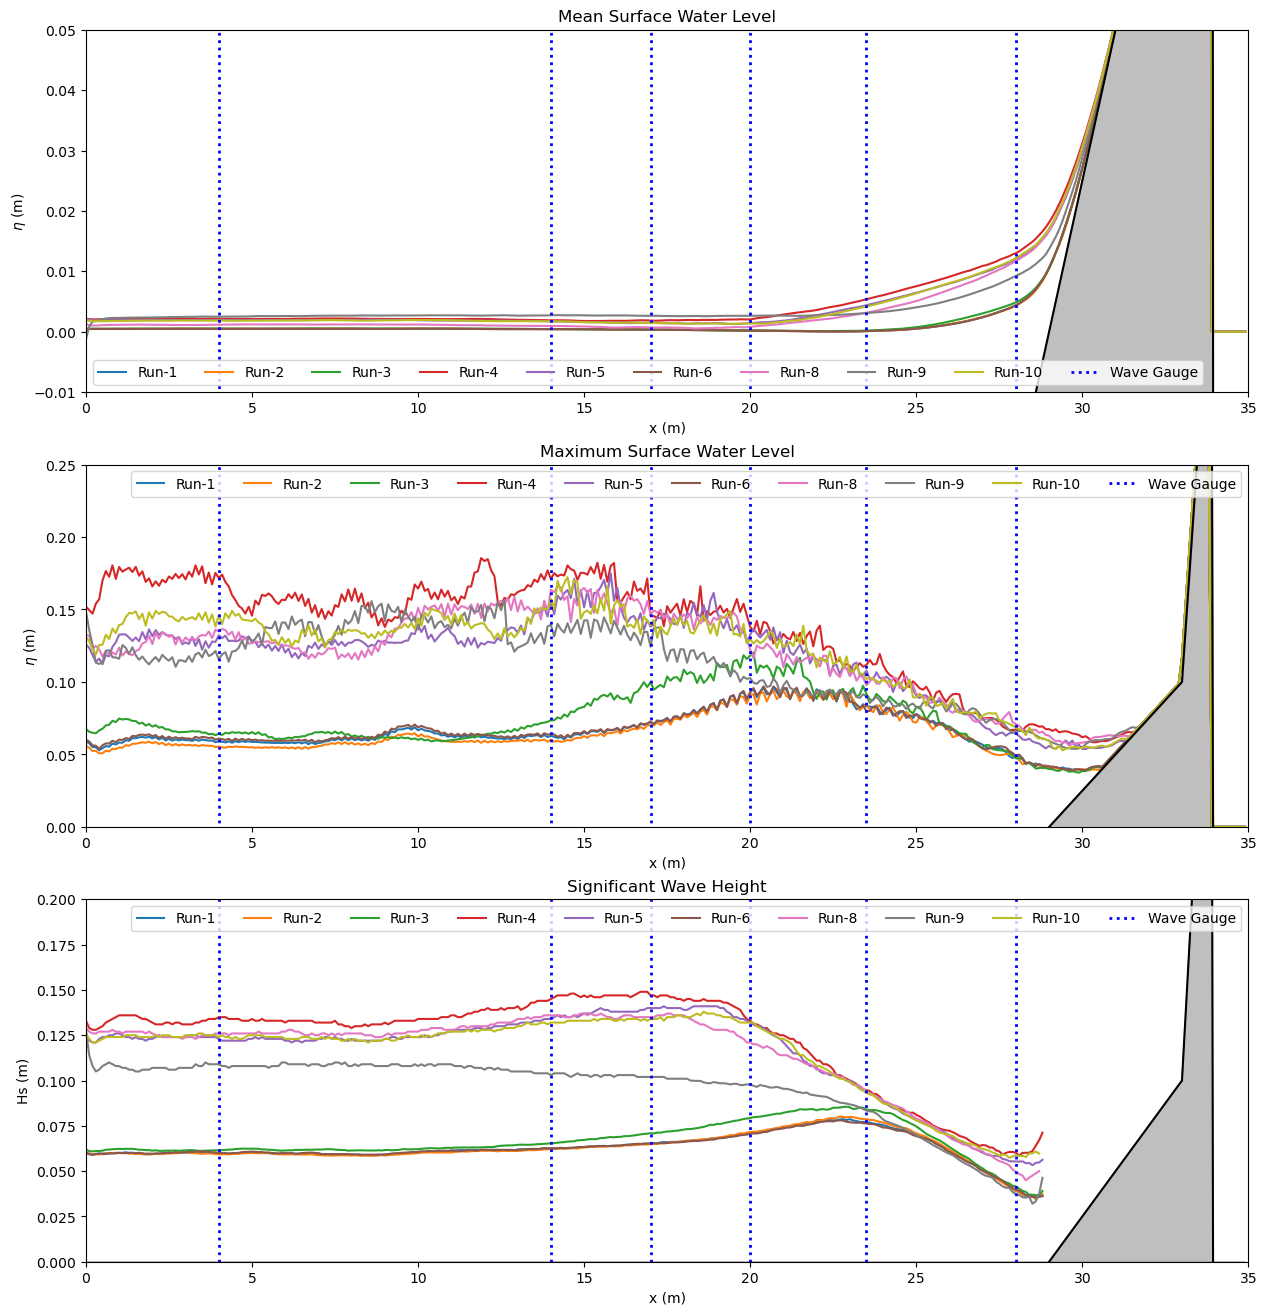

In [164]:
xp = [4,14,17,20,23.5,28]

plt.figure(figsize=[15,16])
plt.subplot(3,1,1)
for i in range(10):
    if i==6:
        continue
    plt.plot(x,wl_mean_all[:,i],label=f'Run-{i+1}')
plt.ylim([-0.01,0.05])
#plt.yscale('log')
plt.xlim(0,35)
plt.plot(x, zbed,'k')
plt.fill_between(x, -0.5, zbed, color="gray", alpha=0.5)
plt.vlines(xp, ymin=-0.5, ymax=0.5, color="blue", linestyle=":", linewidth=2,label='Wave Gauge')
plt.legend(ncol=11)
plt.xlabel('x (m)')
plt.ylabel('$\eta$ (m)')
plt.title('Mean Surface Water Level')

plt.subplot(312)
for i in range(10):
    if i==6:
        continue
    plt.plot(x,wl_max_all[:,i],label=f'Run-{i+1}')
plt.ylim([-0,0.25])
#plt.yscale('log')
plt.xlim(0,35)
plt.plot(x, zbed,'k')
plt.fill_between(x, -0.5, zbed, color="gray", alpha=0.5)
plt.vlines(xp, ymin=-0.5, ymax=0.5, color="blue", linestyle=":", linewidth=2,label='Wave Gauge')
plt.legend(ncol=11)
plt.xlabel('x (m)')
plt.ylabel('$\eta$ (m)')
plt.title('Maximum Surface Water Level')

plt.subplot(313)
for i in range(10):
    if i==6:
        continue
    plt.plot(x,Hs_all[:,i],label=f'Run-{i+1}')
plt.plot(x, zbed,'k')
plt.fill_between(x, zbed, 0, where=(zbed < 1), color="gray", alpha=0.5)
plt.vlines(xp, ymin=0, ymax=0.2, color="blue", linestyle=":", linewidth=2,label='Wave Gauge')
plt.legend(ncol=11)
plt.xlabel('x (m)')
plt.ylabel('Hs (m)');
plt.xlim(0,35)
plt.ylim(0,0.2)
plt.title('Significant Wave Height')

Text(0.5, 1.0, 'Instrument Location')

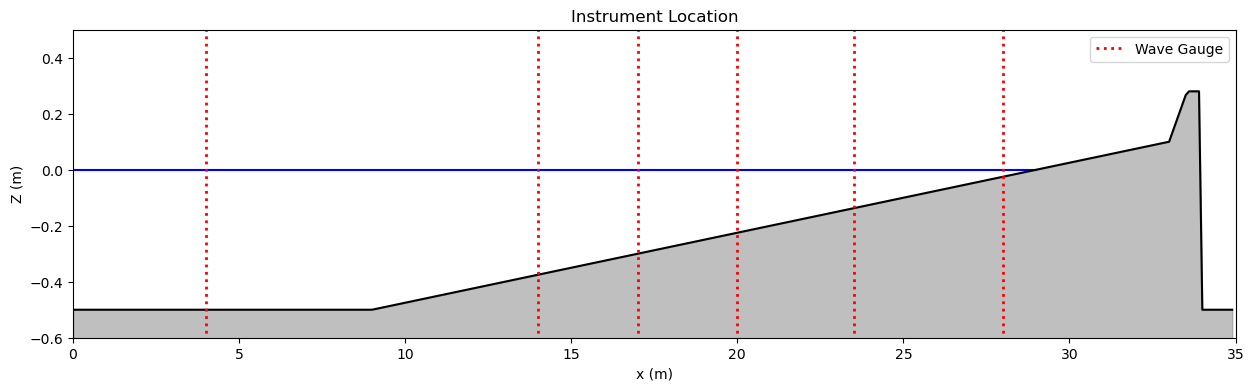

In [ ]:
plt.figure(figsize=[15,4])
plt.plot([0,29],[0,0],'blue')
plt.plot(x, zbed,'k')
plt.ylim([-0.6,0.5])
plt.xlim(0,35)
plt.fill_between(x, zbed, -1,color="gray", alpha=0.5)
plt.vlines(xp, ymin=-1, ymax=0.5, color="red", linestyle=":", linewidth=2,label='Wave Gauge')
plt.legend(ncol=10)
plt.xlabel('x (m)')
plt.ylabel('Z (m)')
plt.title('Instrument Location')

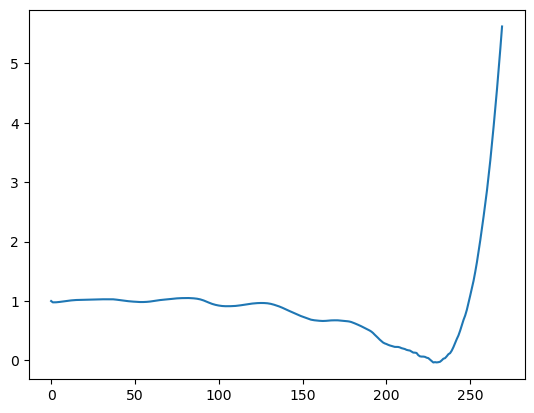

In [ ]:
plt.plot(mean_wl[:270]/mean_wl[0])